In [4]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Color and Type Probability Charts

To start, let's bring in the files we saved from the previous workbook, and add them as variables.

In [5]:
def read_file(path_to_json):
    with open(path_to_json, encoding = 'utf-8') as f:
        data = f.read()
        json_data = json.loads(data) 
    return json_data

color_given_typing_likelihoods = read_file('./data/probabilities/type_and_color_pair_likelihood.json')
typing_given_color_likelihoods = read_file('./data/probabilities/color_and_type_pair_likelihood.json')
type_given_type_likelihoods = read_file('./data/probabilities/type_pair_likelihood.json')
color_given_color_likelihoods = read_file('./data/probabilities/color_pair_likelihood.json')

We will save all these into DataFrames, which makes it a lot easier to add/remove certain data, and also use it for the charts.

In [6]:
# Reuseable function to mask for certain percentage ranges
def mask_percents(df, lower_limit = 0, upper_limit = 1):

    mask_start = df >= lower_limit
    df_masked = df[mask_start]

    mask_stop = df_masked <= upper_limit
    df_masked = df_masked[mask_stop]

    return df_masked

In [7]:
def create_df(data, sort = True):
    df = pd.DataFrame(data)

    columns = list(df.columns.values)

    df_array = []
    if (sort):
        for col in columns:
            sort_df = df[col]
            sort_df.sort_values(ascending=False)
            
            sort_df_index = sort_df.index
            sort_df_values = np.array(sort_df.values)

            new_df = pd.DataFrame(sort_df_values, index=sort_df_index, columns=[col])
            # new_df = pd.DataFrame(sort_df)

            df_array.append(new_df)

    return df_array

In [8]:
# Saving dataframe for Color given Typing
# df_cgt = create_df(color_given_typing_likelihoods)
df_cgt = pd.DataFrame(color_given_typing_likelihoods)
# df_cgt_0_1 = mask_percents(pd.DataFrame(color_given_typing_likelihoods), 0, 1)
# df_cgt_01_1 = mask_percents(pd.DataFrame(color_given_typing_likelihoods), 0.1, 1)
# df_cgt_02_1 = mask_percents(pd.DataFrame(color_given_typing_likelihoods), 0.2, 1)
# df_cgt_03_1 = mask_percents(pd.DataFrame(color_given_typing_likelihoods), 0.3, 1)
# df_cgt_04_1 = mask_percents(pd.DataFrame(color_given_typing_likelihoods), 0, 1)

# print(df_cgt.head())
print(df_cgt)

# saving dataframe for Type given Color
df_tgc = mask_percents(pd.DataFrame(typing_given_color_likelihoods), 0.10, 1)
# print(df_tgc.head())

# saving dataframe for Type given Type
df_tgt = mask_percents(pd.DataFrame(type_given_type_likelihoods))
# print(df_tgt.head())

# saving dataframe for Color given Color
df_cgc = mask_percents(pd.DataFrame(color_given_color_likelihoods), 0.10, 1)
# print(df_cgc.head())

                   Bug     Dark   Dragon  Electric    Fairy  Fighting  \
darkslategray  0.40002  0.53571  0.37492   0.47364  0.41813   0.54839   
dimgray        0.37649  0.53571  0.39286   0.42109  0.29093   0.30638   
gray           0.27055  0.25000  0.25000   0.14036  0.23630   0.35484   
red            0.23531  0.14286  0.07143   0.05256  0.01810   0.14509   
indianred      0.22349  0.14286  0.21429   0.05256  0.18183   0.12903   
...                ...      ...      ...       ...      ...       ...   
plum           0.00000  0.00000  0.00000   0.00000  0.03637   0.00000   
powderblue     0.00000  0.00000  0.01778   0.00000  0.00000   0.00000   
slateblue      0.00000  0.00000  0.00000   0.00000  0.00000   0.00000   
teal           0.00000  0.01778  0.01778   0.01747  0.03637   0.00000   
whitesmoke     0.00000  0.00000  0.00000   0.00000  0.00000   0.00000   

                  Fire   Flying    Ghost    Grass   Ground      Ice   Normal  \
darkslategray  0.49293  0.60197  0.44222  0

In [9]:
def plot_cgt_data(df, title, xlabel, ylabel, lower_limit = 0, upper_limit = 1):
    fig = plt.figure(figsize = (18, 6))

    # df_arr_masked = []
    # for item in df:
    #     masked = mask_percents(item, lower_limit, upper_limit)
    #     masked = masked.dropna()
    #     transposed = masked.transpose()
    #     df_arr_masked.append(transposed)

    df_masked = mask_percents(df, lower_limit, upper_limit)
    df_masked = df_masked.transpose()
    # df_masked = df.transpose()

    y_offset = np.zeros(len(df_masked.index))
    # y_offset = np.zeros(len(df[0].index))

    for index, col in enumerate(df_masked.columns):
        plt.bar(df_masked.index, df_masked[col], bottom = y_offset, color = col, edgecolor = 'black', label = col)
        y_offset = y_offset + df_masked[col]

    # for col in df_arr_masked:
    #     column = col.index.values[0]
    #     values = col.values[0]
    #     index = col.columns.values
    #     plt.bar(index, values, bottom = y_offset, color = column, edgecolor = 'black', label = column)
    #     y_offset = y_offset + values
        

    plot_title = f'{title} - {str(round(lower_limit * 100, 2))}% to {str(round(upper_limit * 100, 2))}%'
    # plot_title = title
    plt.title(plot_title)
    plt.ylabel(f'{ylabel}', fontsize = 15)
    plt.xlabel(xlabel, fontsize = 15)
    plt.xticks(rotation = 45, fontsize = 12)

    return fig


# def plot_tgt_data(df, color_df, xlabel, ylabel, legend=True):
#     fig = plt.figure(figsize = (18, 6))

#     for index, col in enumerate(df.columns):
#         colors = color_df[col]
#         most_likely_color = colors.head(1).index.values[0]
#         _ = plt.bar(df.index, df[col], edgecolor = 'black', label = col)

#     plt.ylabel(ylabel, fontsize = 15)
#     plt.xlabel(xlabel, fontsize = 15)
#     plt.xticks(rotation = 45)

#     if legend:
#         plt.legend()

#     return fig

The most interesting probability chart to see is the probability that, given a type, it will be a certain color. We can plot this out in a stacked bar chart, to see the probabilities that a type will be a certain color. The resulting bar chart is basically a color palette for each type, which is pretty neat. 

We can also use the masking from above to restrict to probabilities of 0.1 and up, 0.2 and up, etc, to see differing charts. From below, you can see that once it gets to 0.4 to 1, some types have no bars.

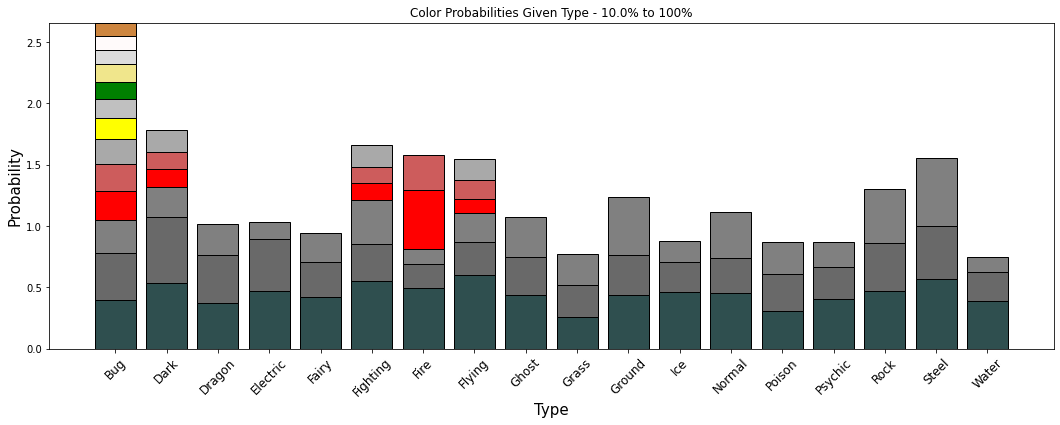

In [14]:
# fig_cgt = plot_cgt_data(df_cgt_01_1, 'Color Probabilities Given Type', 'Type', 'Probability')

# fig_cgt_1 = plot_cgt_data(df_cgt, 'Color Probabilities Given Type', 'Type', 'Probability')

# fig_cgt_2 = plot_cgt_data(df_cgt, 'Color Probabilities Given Type', 'Type', 'Probability', 0.05, 1)

fig_cgt_2 = plot_cgt_data(df_cgt, 'Color Probabilities Given Type', 'Type', 'Probability', 0.10, 1)

# fig_cgt_3 = plot_cgt_data(df_cgt, 'Color Probabilities Given Type', 'Type', 'Probability', 0.20, 1)

# fig_cgt_4 = plot_cgt_data(df_cgt, 'Color Probabilities Given Type', 'Type', 'Probability', 0.30, 1)

# fig_cgt_5 = plot_cgt_data(df_cgt, 'Color Probabilities Given Type', 'Type', 'Probability', 0.40, 1)


In [11]:
# def standardize(ts):

#     means = dict()
#     stds = dict()
#     for index, word in enumerate(ts.columns):
#         mean = np.mean(ts[word])
#         std = np.std(ts[word])
#         means[word] = mean
#         stds[word] = std
    
#     std_ts = ts.transform(lambda x: ( x - means[x.name] ) / stds[x.name] )
    
#     return std_ts

In [12]:
# df_std_cgt = standardize(df_cgt)
# print(df_std_cgt.head())